In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import datasets

In [3]:
from constants import *

### Prepare dataset

In [149]:
datasets.prepare(True, False, False)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [5]:
import glob
files = glob.glob(f'{SCRATCH_DIR}/*.utf')

In [132]:
files = glob.glob(f'{SCRATCH_DIR}/BWV-*nomask*fermatas.utf')
datasets.concatenate_corpus(files, open(f'{OUT_DIR}/concat_corpus.utf', 'w'))

Writing concatenated corpus to /home/paperspace/music_rnn/data/out/concat_corpus.utf


In [167]:
files = glob.glob(f'{SCRATCH_DIR}/BWV-*nomask*fermatas.txt')
datasets.concatenate_corpus(files, open(f'{OUT_DIR}/concat_corpus.txt', 'w'))

Writing concatenated corpus to /home/paperspace/music_rnn/data/out/concat_corpus.txt


In [112]:
fb = open(files[0], 'rb').read()

In [ ]:
open(f'{OUT_DIR}/concat_corpus.utf', 'r').read()

In [150]:
txt_to_utf, utf_to_txt = datasets.build_vocabulary()

Writing vocabulary to /home/paperspace/music_rnn/data/scratch/utf_to_txt.json


In [134]:
# datasets.to_text_from_utf(utf_to_txt, files[0])
datasets.to_text_from_utf(utf_to_txt, f'{OUT_DIR}/concat_corpus.utf')[:10]

['START',
 '(79, False)',
 '(72, False)',
 '(64, False)',
 '(60, False)',
 '|||',
 '(79, True)',
 '(72, True)',
 '(64, True)',
 '(60, True)']

### Create h5 model?

In [66]:
import torch_rnn

In [68]:
torch_rnn.make_h5(open(f'{OUT_DIR}/concat_corpus.txt', 'rb'), f'{OUT_DIR}')

Processing corpus at: /home/paperspace/music_rnn/data/out/concat_corpus.txt
Outputting to: /home/paperspace/music_rnn/data/out/concat_corpus{h5,json}


### Decode

In [6]:
import decode

In [181]:
with open(f'{SCRATCH_DIR}/utf_to_txt.json', 'r') as f:
    decode.sampled_stream(f, f'{OUT_DIR}/concat_corpus.utf', f'{OUT_DIR}', 100, 400)

Writing /home/paperspace/music_rnn/data/out/out-0
Writing /home/paperspace/music_rnn/data/out/out-1
Writing /home/paperspace/music_rnn/data/out/out-2
Writing /home/paperspace/music_rnn/data/out/out-3
Writing /home/paperspace/music_rnn/data/out/out-4
Writing /home/paperspace/music_rnn/data/out/out-5
Writing /home/paperspace/music_rnn/data/out/out-6
Writing /home/paperspace/music_rnn/data/out/out-7
Writing /home/paperspace/music_rnn/data/out/out-8
Writing /home/paperspace/music_rnn/data/out/out-9
Writing /home/paperspace/music_rnn/data/out/out-10
Writing /home/paperspace/music_rnn/data/out/out-11
Writing /home/paperspace/music_rnn/data/out/out-12
Writing /home/paperspace/music_rnn/data/out/out-13
Writing /home/paperspace/music_rnn/data/out/out-14
Writing /home/paperspace/music_rnn/data/out/out-15
Writing /home/paperspace/music_rnn/data/out/out-16
Writing /home/paperspace/music_rnn/data/out/out-17
Writing /home/paperspace/music_rnn/data/out/out-18
Writing /home/paperspace/music_rnn/data/o

KeyboardInterrupt: 

In [7]:
import json
import codecs

In [174]:
with open(f'{SCRATCH_DIR}/utf_to_txt.json', 'r') as f:
    utf_to_txt = json.load(f)
#    utf_data = filter(lambda x: x != u'\n', codecs.open(utf8_file, "r", "utf-8").read())
    utf8_file = f'{OUT_DIR}/concat_corpus.utf'
    utf_data = filter(lambda x: x != u'\n', codecs.open(utf8_file, "r", "utf-8").read())
    utf_string = ''.join(list(utf_data))
    utf_scores = utf_string.split(START_DELIM)[1:] # [1:] ignores first START_DELIM
    print(len(utf_scores))
#     json.loads(f.read())

334


In [171]:
START_DELIM

'ї'

### Playing files

In [54]:

from music21 import *

# import random
# keyDetune = []
# for i in range(0, 127):
#     keyDetune.append(random.randint(-30, 30))
    
# b = corpus.parse('bwv66.6')
# for n in b.flat.notes:
#    n.pitch.microtone = keyDetune[n.pitch.midi]
# sp = midi.realtime.StreamPlayer(b)
# sp.play()

In [9]:
out_files = glob.glob(f'{OUT_DIR}/*')

In [10]:
out_files

['/home/paperspace/music_rnn/data/out/out-18.xml',
 '/home/paperspace/music_rnn/data/out/out-20.txt',
 '/home/paperspace/music_rnn/data/out/out-9.txt',
 '/home/paperspace/music_rnn/data/out/out-14.txt',
 '/home/paperspace/music_rnn/data/out/out-15.xml',
 '/home/paperspace/music_rnn/data/out/out-7.xml',
 '/home/paperspace/music_rnn/data/out/out-14.xml',
 '/home/paperspace/music_rnn/data/out/out-19.xml',
 '/home/paperspace/music_rnn/data/out/out-4.txt',
 '/home/paperspace/music_rnn/data/out/out-1.xml',
 '/home/paperspace/music_rnn/data/out/out-18.midi',
 '/home/paperspace/music_rnn/data/out/out-9.xml',
 '/home/paperspace/music_rnn/data/out/out-0.xml',
 '/home/paperspace/music_rnn/data/out/out-6.xml',
 '/home/paperspace/music_rnn/data/out/concat_corpus.utf',
 '/home/paperspace/music_rnn/data/out/out-12.xml',
 '/home/paperspace/music_rnn/data/out/out-2.xml',
 '/home/paperspace/music_rnn/data/out/out-21.txt',
 '/home/paperspace/music_rnn/data/out/concat_corpus.txt',
 '/home/paperspace/music

In [190]:
s = converter.parse(out_files[0])

In [ ]:
with open('/home/paperspace/music_rnn/data/out/out-13.xml', 'r') as f:
    print(f.read())

In [66]:
s = converter.parse('/home/paperspace/music_rnn/data/out/out-13.xml')

In [51]:
s.metadata.title

'Music21 Fragment'

In [69]:
s.show()

SubConverterFileIOException: png file of xml not found. Is your file >999 pages?

In [45]:
fp = s.write('midi', fp='/home/paperspace/music_rnn/data/out/out-13.midi')

midi.base.py: WARNING: Conversion error for <MidiEvent PROGRAM_CHANGE, t=0, track=1, channel=1>: Got incorrect data for <MidiEvent PROGRAM_CHANGE, t=0, track=1, channel=1> in .data: None,cannot parse Program Change; ignored.


In [15]:
s.show('midi')

midi.base.py: WARNING: Conversion error for <MidiEvent PROGRAM_CHANGE, t=0, track=1, channel=1>: Got incorrect data for <MidiEvent PROGRAM_CHANGE, t=0, track=1, channel=1> in .data: None,cannot parse Program Change; ignored.


In [70]:
environment.get('musescoreDirectPNGPath')

'/usr/bin/musescore-xvfb'

In [71]:
# https://groups.google.com/forum/#!topic/music21list/BC6DsaUQlTQ
path = '/home/paperspace/music_rnn/musescore-xvfb'
# path = '/usr/bin/musescore-xvfb'
environment.set('musescoreDirectPNGPath', path)
environment.set('musicxmlPath', path)

In [46]:
from IPython.lib.display import FileLink

FileLink('data/out/out-13.midi')

/home/paperspace/music_rnn/data/out/out-13.midi

In [32]:
t = "Sach' Gott heimgestellt"
a = next(corpus.chorales.Iterator())

In [38]:
a.show('midi')

In [39]:
fp = a.write('midi', fp='/home/paperspace/music_rnn/data/out/testout.midi')

In [41]:
FileLink('data/out/testout.midi')

/home/paperspace/music_rnn/data/out/testout.midi

In [61]:
import matplotlib.pyplot as plt

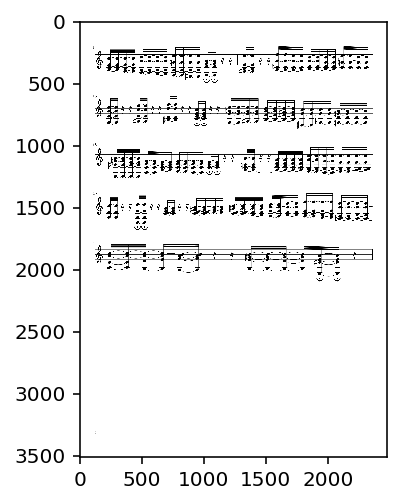

In [64]:
plt.imshow(plt.imread('asdf-2.png'))